<a href="https://colab.research.google.com/github/FitriFatimah6/TUBES-PROJECT-UAS/blob/main/Kel1_Fish_Datasets_Visualisasi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOAD DATASETS

In [ ]:
df = pd.read_csv("/content/joined_fish_data.csv")
df.head()

,fish_id,fish_name,weight_kg,length_cm,catch_date,province,fishing_method,freshness_score,category_id,location_id,...,longitude,water_depth_m,temperature_celsius,salinity_ppt,fisher_name,experience_years,boat_type,boat_capacity_kg,home_port,license_number
0,1,Catfish,19.83,115.1,7/6/2023,Papua,Trap,3.0,4,4,...,100.237065,2780,29.8,33.5,Nelayan_381,26,Motor Boat,3264,Sulawesi Selatan,LIC250393
1,2,Carp,21.02,101.8,11/19/2023,Sulawesi Selatan,Hand Line,10.0,4,12,...,139.649345,728,24.0,33.4,Nelayan_337,19,Motor Boat,4236,Sulawesi Selatan,LIC493492
2,3,Anchovy,43.10,184.4,5/1/2023,Jawa Timur,Purse Seine,4.0,2,18,...,101.236256,2306,24.8,33.7,Nelayan_144,10,Motor Boat,3465,Sumatera Utara,LIC411388
3,4,Sole,36.27,106.9,5/25/2023,Maluku,Gill Net,10.0,1,13,...,137.613943,2682,27.2,32.1,Nelayan_271,5,Motor Boat,1004,Bali,LIC129483
4,5,Sole,15.70,162.8,3/29/2023,Jawa Timur,Trawling,2.0,3,20,...,110.349063,59,28.7,31.0,Nelayan_244,13,Trawler,379,Papua,LIC188541


# VISUALISASI DATA

# 1. Rata - Rata

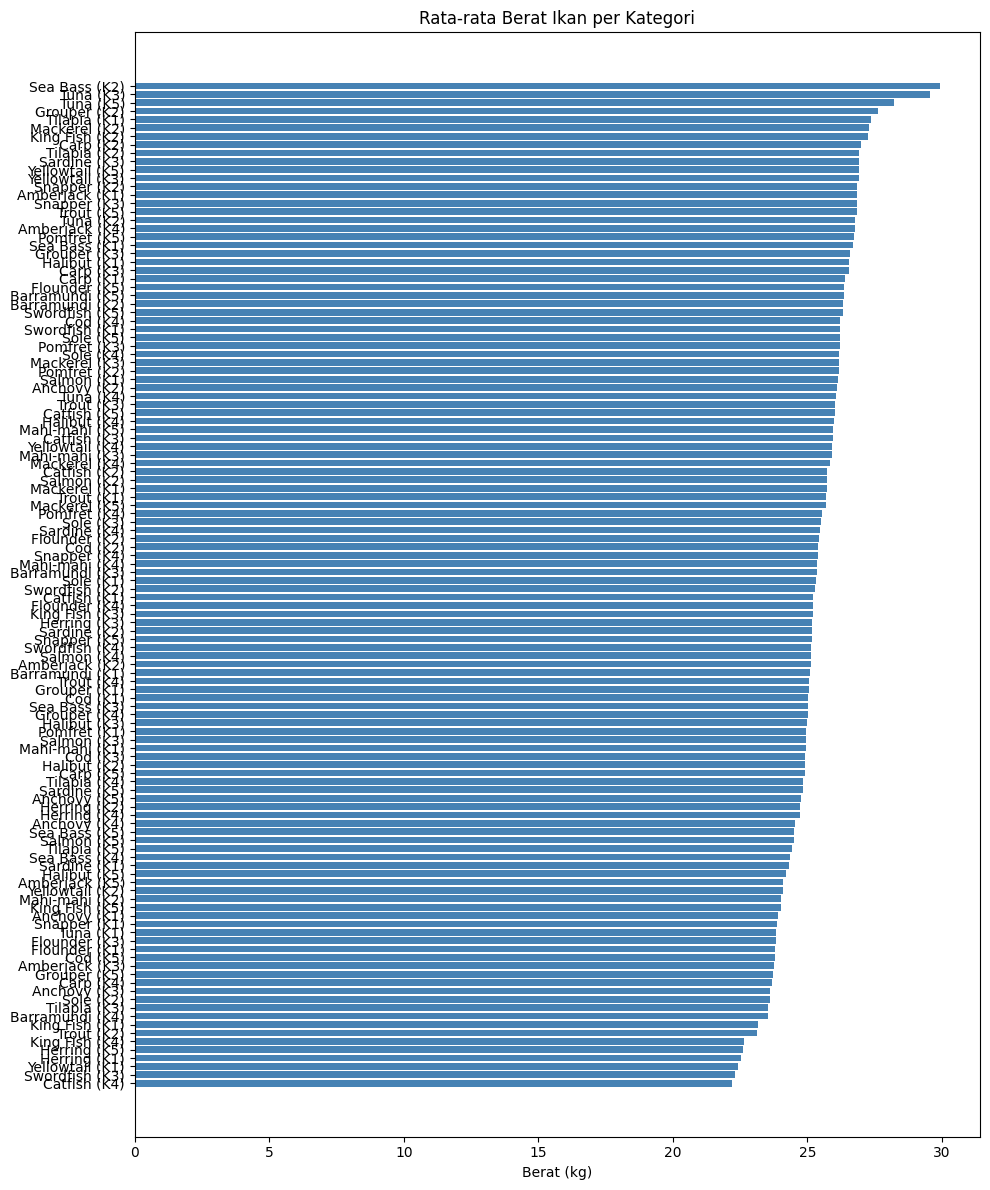

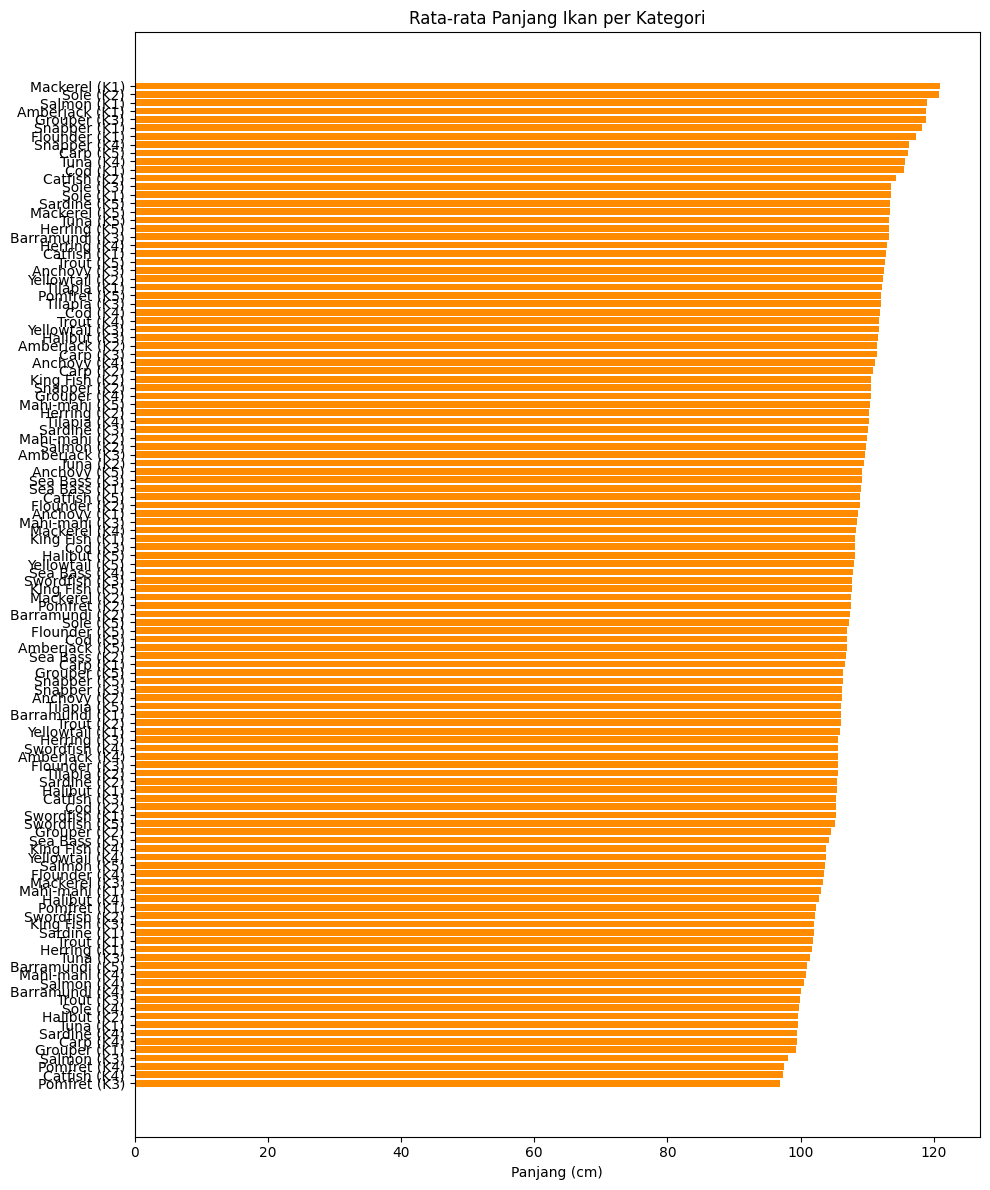

In [ ]:
# Buat label kombinasi nama ikan + kategori
rata_rata['label'] = rata_rata['fish_name'] + ' (K' + rata_rata['category_id'].astype(str) + ')'

# Urutkan data berdasarkan berat untuk tampilan rapi
rata_rata_sorted_berat = rata_rata.sort_values('weight_kg')
rata_rata_sorted_panjang = rata_rata.sort_values('length_cm')

# === Grafik 1: Rata-rata Berat Ikan ===
plt.figure(figsize=(10, 12))
plt.barh(rata_rata_sorted_berat['label'], rata_rata_sorted_berat['weight_kg'], color='steelblue')
plt.xlabel('Berat (kg)')
plt.title('Rata-rata Berat Ikan per Kategori')
plt.tight_layout()
plt.show()

# === Grafik 2: Rata-rata Panjang Ikan ===
plt.figure(figsize=(10, 12))
plt.barh(rata_rata_sorted_panjang['label'], rata_rata_sorted_panjang['length_cm'], color='darkorange')
plt.xlabel('Panjang (cm)')
plt.title('Rata-rata Panjang Ikan per Kategori')
plt.tight_layout()
plt.show()


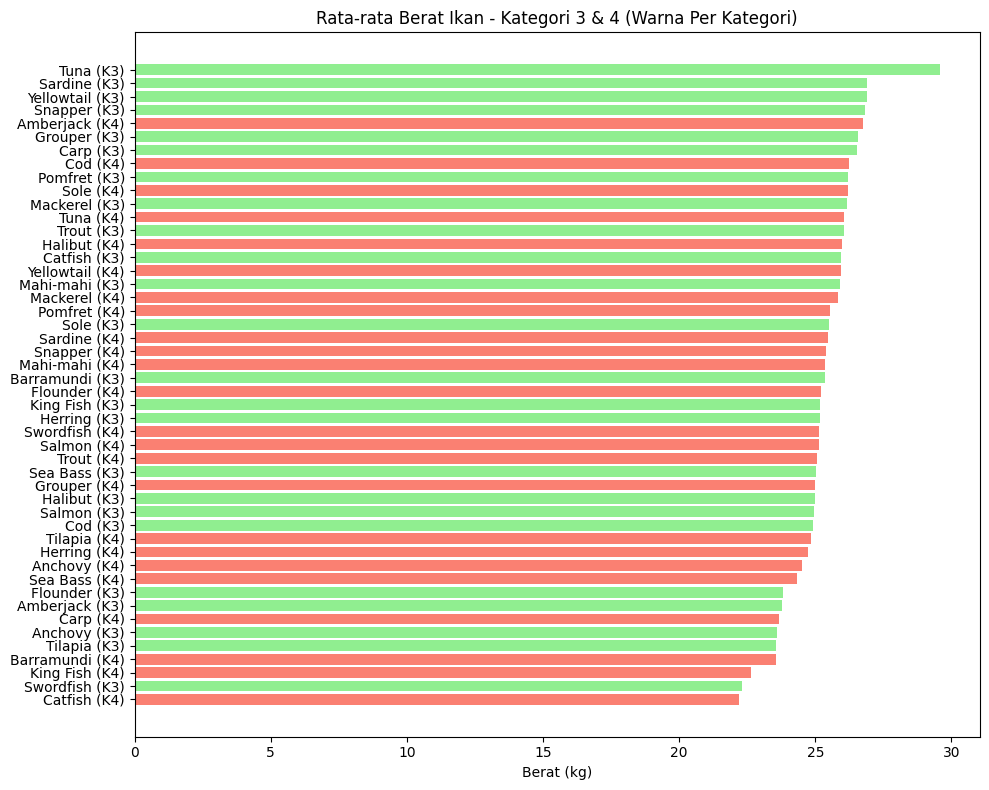

In [ ]:
# Filter hanya kategori 3 dan 4
filtered_df = rata_rata[rata_rata['category_id'].isin([3, 4])].copy()

# Pastikan kategori bertipe int
filtered_df['category_id'] = filtered_df['category_id'].astype(int)

# Buat label
filtered_df['label'] = filtered_df['fish_name'] + ' (K' + filtered_df['category_id'].astype(str) + ')'

# Urutkan
sorted_df = filtered_df.sort_values('weight_kg')

# Pemetaan warna per kategori
color_map = {
    3: 'lightgreen',
    4: 'salmon'      # Added color for category 4
}
bar_colors = sorted_df['category_id'].map(color_map)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_df['label'], sorted_df['weight_kg'], color=bar_colors)
plt.xlabel('Berat (kg)')
plt.title('Rata-rata Berat Ikan - Kategori 3 & 4 (Warna Per Kategori)')
plt.tight_layout()
plt.show()

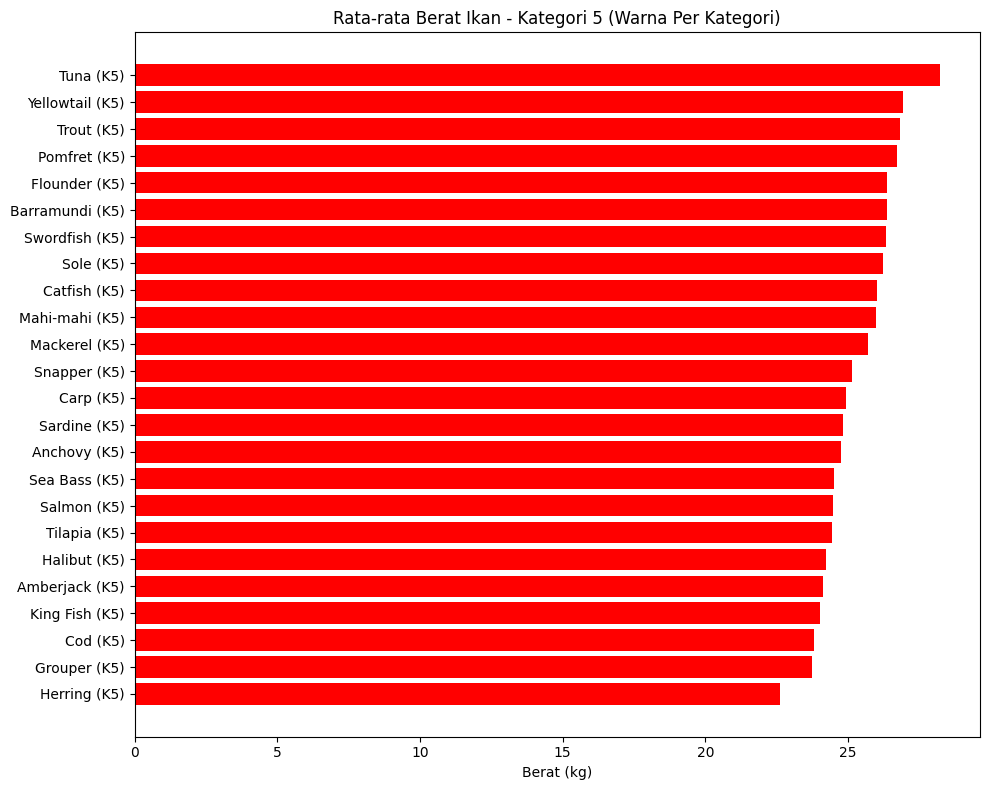

In [ ]:
# Filter hanya kategori 5
filtered_df = rata_rata[rata_rata['category_id'].isin([5 ])].copy()

# Pastikan kategori bertipe int
filtered_df['category_id'] = filtered_df['category_id'].astype(int)

# Buat label
filtered_df['label'] = filtered_df['fish_name'] + ' (K' + filtered_df['category_id'].astype(str) + ')'

# Urutkan
sorted_df = filtered_df.sort_values('weight_kg')

# Pemetaan warna per kategori
color_map = {
    5 : 'red'
}
bar_colors = sorted_df['category_id'].map(color_map)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_df['label'], sorted_df['weight_kg'], color=bar_colors)
plt.xlabel('Berat (kg)')
plt.title('Rata-rata Berat Ikan - Kategori 5 (Warna Per Kategori)')
plt.tight_layout()
plt.show()


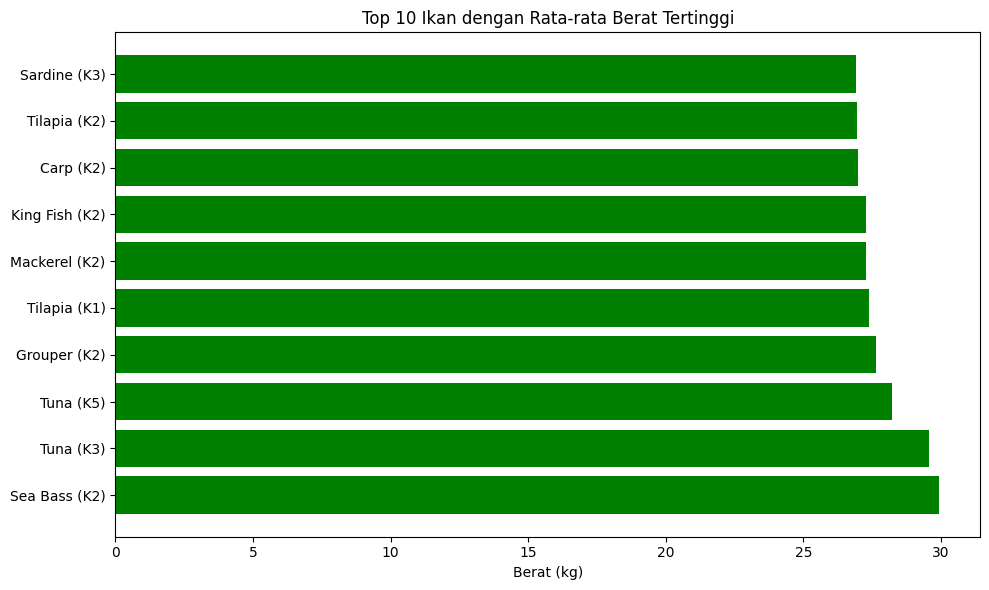

In [ ]:
# Top 10 ikan dengan berat tertinggi
top_berat = rata_rata.sort_values('weight_kg', ascending=False).head(10)
top_berat['label'] = top_berat['fish_name'] + ' (K' + top_berat['category_id'].astype(str) + ')'

plt.figure(figsize=(10, 6))
plt.barh(top_berat['label'], top_berat['weight_kg'], color='green')
plt.xlabel('Berat (kg)')
plt.title('Top 10 Ikan dengan Rata-rata Berat Tertinggi')
plt.tight_layout()
plt.show()


# 2. Total Tangkapan Nelayan

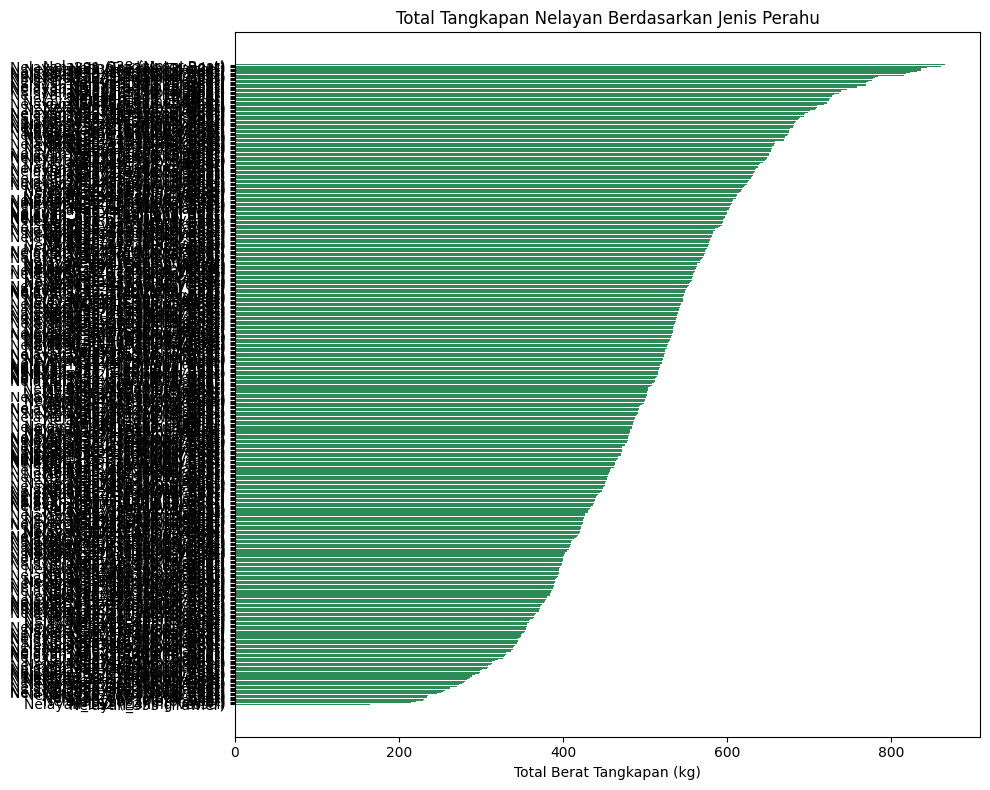

In [ ]:
# Calculate the total catch weight per fisherman and boat type
total_tangkapan = df.groupby(['fisher_name', 'boat_type'])['weight_kg'].sum().reset_index()

# Buat label kombinasi nama nelayan dan jenis perahu
total_tangkapan['label'] = total_tangkapan['fisher_name'] + ' (' + total_tangkapan['boat_type'] + ')'

# Urutkan berdasarkan total berat tangkapan
total_tangkapan_sorted = total_tangkapan.sort_values('weight_kg', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(total_tangkapan_sorted['label'], total_tangkapan_sorted['weight_kg'], color='seagreen')
plt.xlabel('Total Berat Tangkapan (kg)')
plt.title('Total Tangkapan Nelayan Berdasarkan Jenis Perahu')
plt.tight_layout()
plt.show()

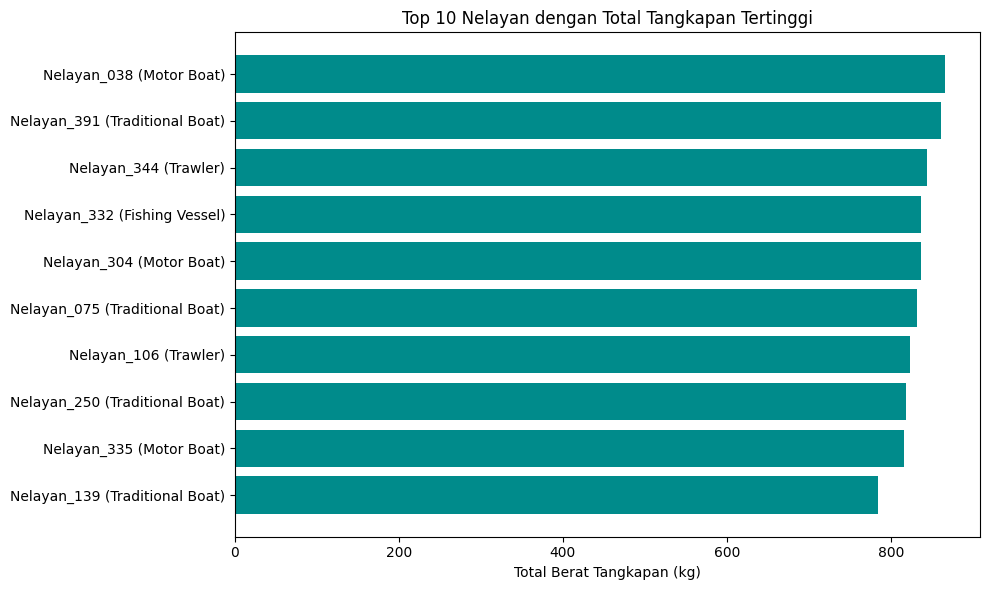

In [ ]:
# Calculate the total catch weight per fisherman and boat type
total_tangkapan = df.groupby(['fisher_name', 'boat_type'])['weight_kg'].sum().reset_index()

# Buat label gabungan nama nelayan dan jenis perahu
total_tangkapan['label'] = total_tangkapan['fisher_name'] + ' (' + total_tangkapan['boat_type'] + ')'

# Ambil 10 besar berdasarkan berat tangkapan
top_10 = total_tangkapan.sort_values('weight_kg', ascending=False).head(10)

# Urutkan agar grafiknya dari yang kecil ke besar (biar urut dari bawah ke atas)
top_10_sorted = top_10.sort_values('weight_kg', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_sorted['label'], top_10_sorted['weight_kg'], color='darkcyan')
plt.xlabel('Total Berat Tangkapan (kg)')
plt.title('Top 10 Nelayan dengan Total Tangkapan Tertinggi')
plt.tight_layout()
plt.show()

# 3. Hubungan Pengalaman Nelayan dengan Volume Tangkapan

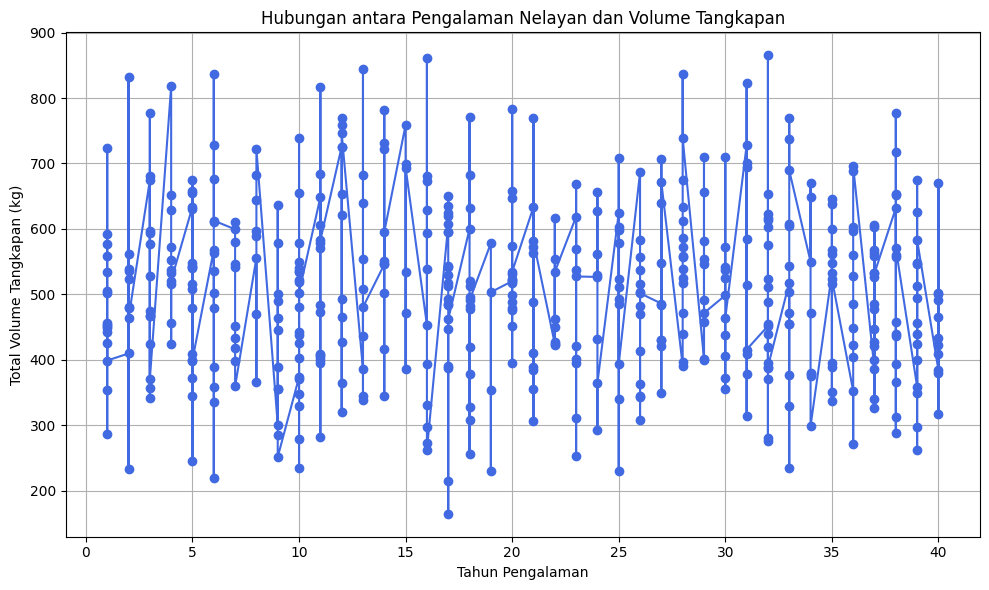

In [ ]:
# Calculate total catch weight and average experience per fisherman
experience = df.groupby('fisher_name').agg(
    total_weight_kg=('weight_kg', 'sum'),
    average_experience_years=('experience_years', 'mean')
).reset_index()

# Rename columns for clarity in plotting
experience = experience.rename(columns={
    'total_weight_kg': 'weight_kg',
    'average_experience_years': 'experience_years'
})

# Urutkan berdasarkan pengalaman
experience_sorted = experience.sort_values('experience_years')

# Plot garis dengan titik
plt.figure(figsize=(10, 6))
plt.plot(experience_sorted['experience_years'], experience_sorted['weight_kg'], marker='o', linestyle='-', color='royalblue')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Total Volume Tangkapan (kg)')
plt.title('Hubungan antara Pengalaman Nelayan dan Volume Tangkapan')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Distribusi Lokasi Penangkapan

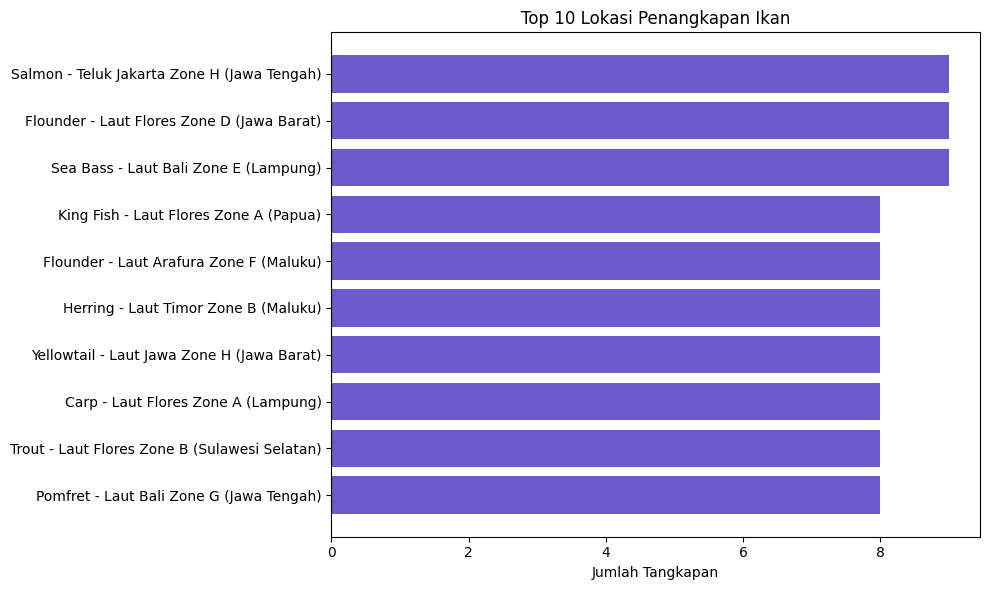

In [ ]:
# Calculate the number of catches per location, including fish name and province
lokasi = df.groupby(['fish_name', 'location_name', 'province']).size().reset_index(name='jumlah_tangkapan')

# Buat label lokasi yang deskriptif
lokasi['label'] = lokasi['fish_name'] + ' - ' + lokasi['location_name'] + ' (' + lokasi['province'] + ')'

# Ambil 10 lokasi dengan jumlah tangkapan terbanyak
top10_lokasi = lokasi.sort_values('jumlah_tangkapan', ascending=False).head(10)

# Urutkan agar grafik dari kecil ke besar
top10_lokasi = top10_lokasi.sort_values('jumlah_tangkapan')

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10_lokasi['label'], top10_lokasi['jumlah_tangkapan'], color='slateblue')
plt.xlabel('Jumlah Tangkapan')
plt.title('Top 10 Lokasi Penangkapan Ikan')
plt.tight_layout()
plt.show()

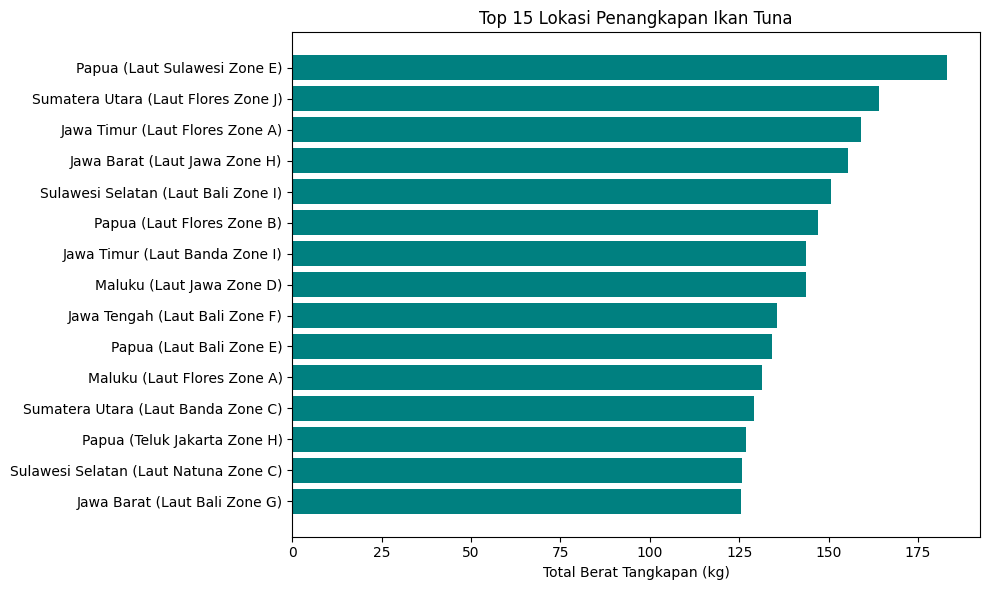

In [ ]:
# Filter hanya data ikan Tuna
tuna_df = df[df['fish_name'] == 'Tuna'].copy()

# Hitung total berat tangkapan per lokasi (provinsi & nama lokasi)
lokasi = tuna_df.groupby(['province', 'location_name'])['weight_kg'].sum().reset_index()

# Buat label untuk visualisasi
lokasi['label'] = lokasi['province'].astype(str) + ' (' + lokasi['location_name'].astype(str) + ')'

# Ambil Top 10 lokasi dengan tangkapan terbanyak
top15_lokasi = lokasi.sort_values('weight_kg', ascending=False).head(15)

# Urutkan kembali agar grafik bar naik dari bawah ke atas
top15_lokasi = top15_lokasi.sort_values('weight_kg', ascending=True)

# Plot grafik batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(top15_lokasi['label'], top15_lokasi['weight_kg'], color='teal')
plt.xlabel('Total Berat Tangkapan (kg)')
plt.title('Top 15 Lokasi Penangkapan Ikan Tuna')
plt.tight_layout()
plt.show()


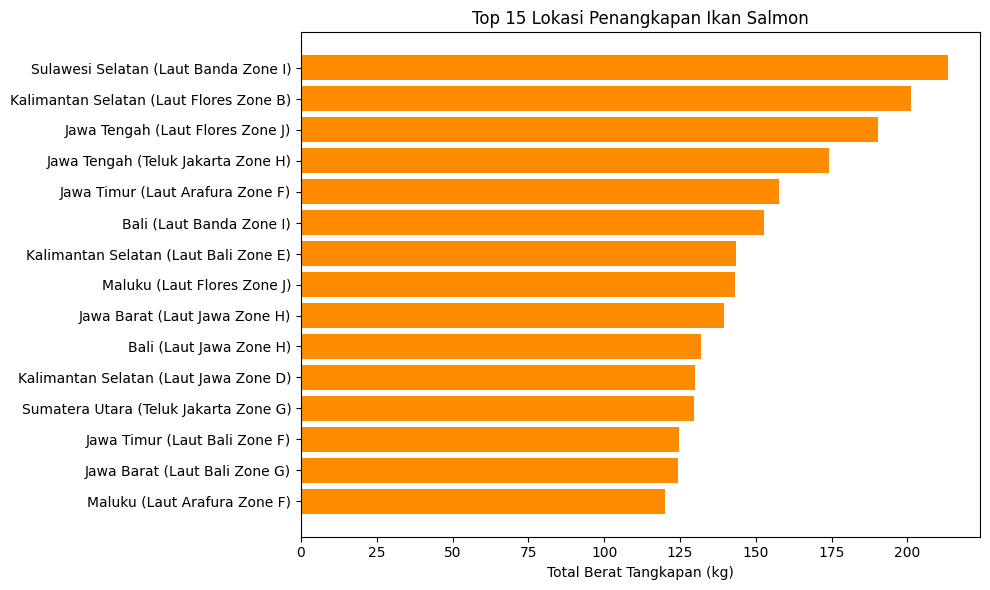

In [ ]:
# Filter hanya data ikan Salmon
salmon_df = df[df['fish_name'] == 'Salmon'].copy()

# Hitung total berat tangkapan per lokasi (provinsi & nama lokasi)
lokasi = salmon_df.groupby(['province', 'location_name'])['weight_kg'].sum().reset_index()

# Buat label gabungan provinsi dan nama lokasi
lokasi['label'] = lokasi['province'].astype(str) + ' (' + lokasi['location_name'].astype(str) + ')'

# Ambil 15 lokasi dengan berat tangkapan tertinggi
top15_lokasi = lokasi.sort_values('weight_kg', ascending=False).head(15)

# Urutkan kembali agar grafik naik dari bawah ke atas
top15_lokasi = top15_lokasi.sort_values('weight_kg', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top15_lokasi['label'], top15_lokasi['weight_kg'], color='darkorange')
plt.xlabel('Total Berat Tangkapan (kg)')
plt.title('Top 15 Lokasi Penangkapan Ikan Salmon')
plt.tight_layout()
plt.show()


# 5. Karakteristik Lingkungan

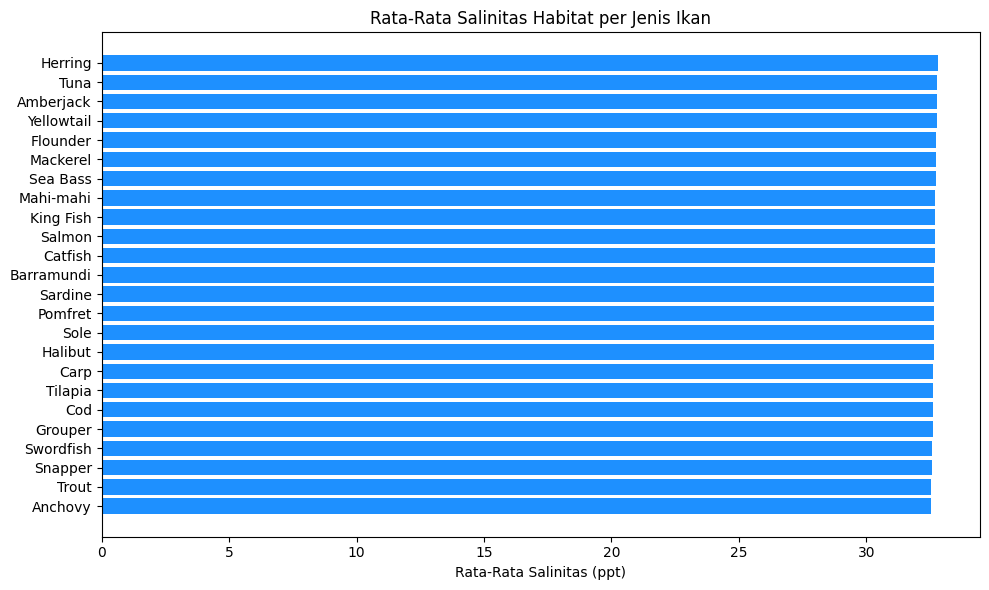

In [ ]:
# Calculate the average salinity per fish name
lingkungan_ikan = df.groupby('fish_name')['salinity_ppt'].mean().reset_index()

# Urutkan berdasarkan salinitas
lingkungan_sorted = lingkungan_ikan.sort_values('salinity_ppt', ascending=True)

# Plot bar horizontal
plt.figure(figsize=(10, 6))
plt.barh(lingkungan_sorted['fish_name'], lingkungan_sorted['salinity_ppt'], color='dodgerblue')
plt.xlabel('Rata-Rata Salinitas (ppt)')
plt.title('Rata-Rata Salinitas Habitat per Jenis Ikan')
plt.tight_layout()
plt.show()

# 6. Metode Penangkapan

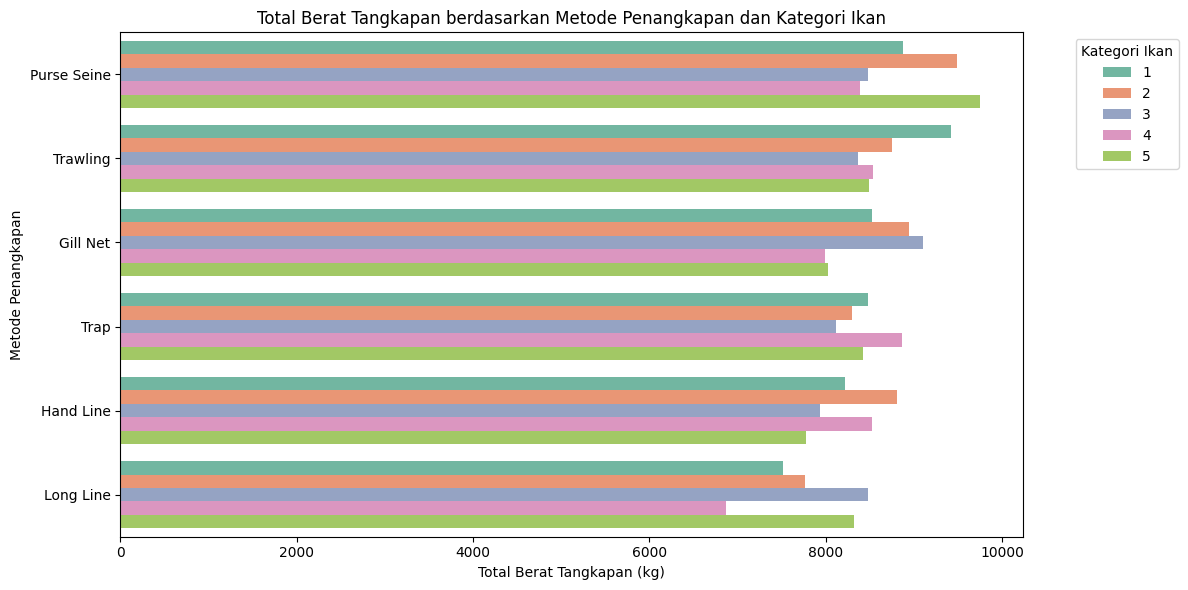

In [ ]:
import seaborn as sns

# Use the correct DataFrame name and group by available columns
metode = df.groupby(['category_id', 'fishing_method'])['weight_kg'].sum().reset_index()
metode = metode.sort_values(by='weight_kg', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=metode, x='weight_kg', y='fishing_method', hue='category_id', palette='Set2')

plt.xlabel('Total Berat Tangkapan (kg)')
plt.ylabel('Metode Penangkapan')
plt.title('Total Berat Tangkapan berdasarkan Metode Penangkapan dan Kategori Ikan')
plt.legend(title='Kategori Ikan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-59-2670361815>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='weight_kg', y='fishing_method', palette='muted')
<ipython-input-59-2670361815>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='weight_kg', y='fishing_method', palette='muted')
<ipython-input-59-2670361815>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='weight_kg', y='fishing_method', palette='muted')
<ipython-input-59-2670361815>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

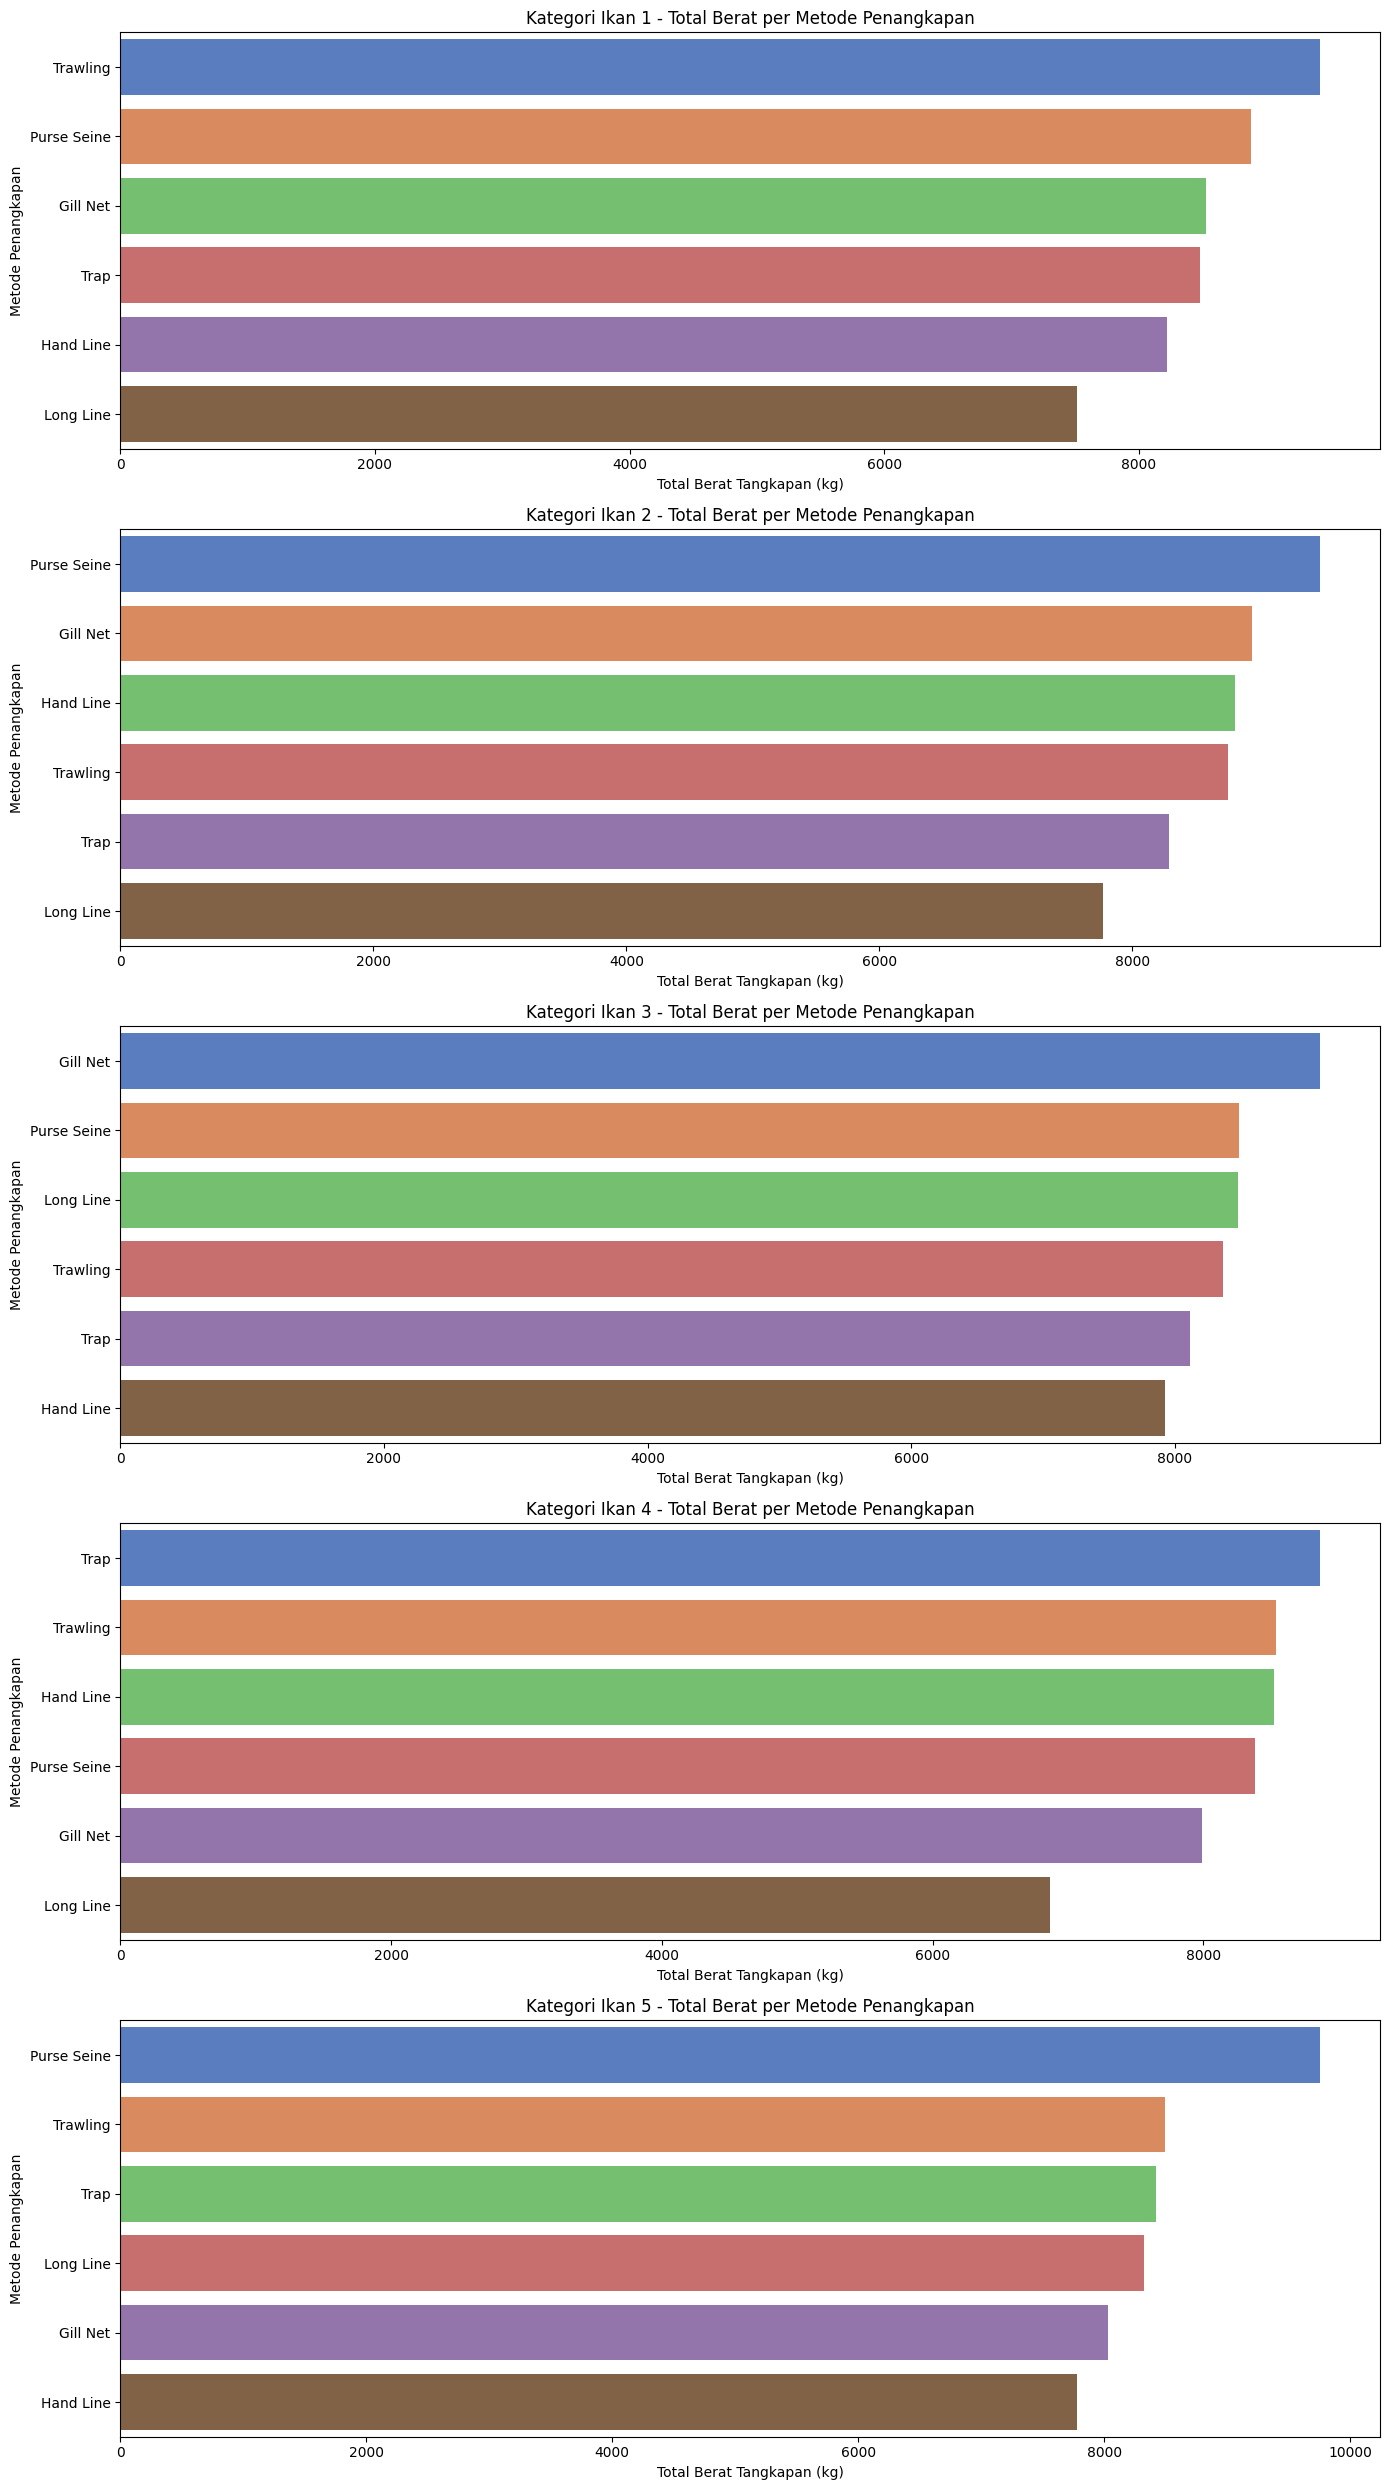

In [ ]:
# Hitung total tangkapan per metode dan kategori ikan
metode = df.groupby(['category_id', 'fishing_method'])['weight_kg'].sum().reset_index()
metode = metode.sort_values(['category_id', 'weight_kg'], ascending=[True, False])

# Ambil semua kategori unik
kategori_unik = metode['category_id'].unique()

# Buat subplot per kategori
plt.figure(figsize=(14, 5 * len(kategori_unik)))

for i, kategori in enumerate(kategori_unik):
    subset = metode[metode['category_id'] == kategori]
    plt.subplot(len(kategori_unik), 1, i+1)
    sns.barplot(data=subset, x='weight_kg', y='fishing_method', palette='muted')
    plt.title(f'Kategori Ikan {kategori} - Total Berat per Metode Penangkapan')
    plt.xlabel('Total Berat Tangkapan (kg)')
    plt.ylabel('Metode Penangkapan')

plt.tight_layout()
plt.show()

# 7. Kesegaran Ikan berdasarkan Tangkapan

In [ ]:
# Pastikan tanggal sudah dalam format datetime
df['catch_date'] = pd.to_datetime(df['catch_date'])

# Hitung rata-rata skor kesegaran per tanggal
kesegaran_ikan = df.groupby('catch_date')['freshness_score'].mean().reset_index()

# Buat plot line
plt.figure(figsize=(12, 6))
plt.plot(kesegaran_ikan['catch_date'], kesegaran_ikan['freshness_score'], marker='o', linestyle='-',
         color='seagreen')

plt.xlabel('Tanggal Penangkapan')
plt.ylabel('Rata-Rata Skor Kesegaran')
plt.title('Tren Rata-Rata Kesegaran Ikan Berdasarkan Tangkapan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'joined_df' is not defined

# 8. Analisis Kualitas

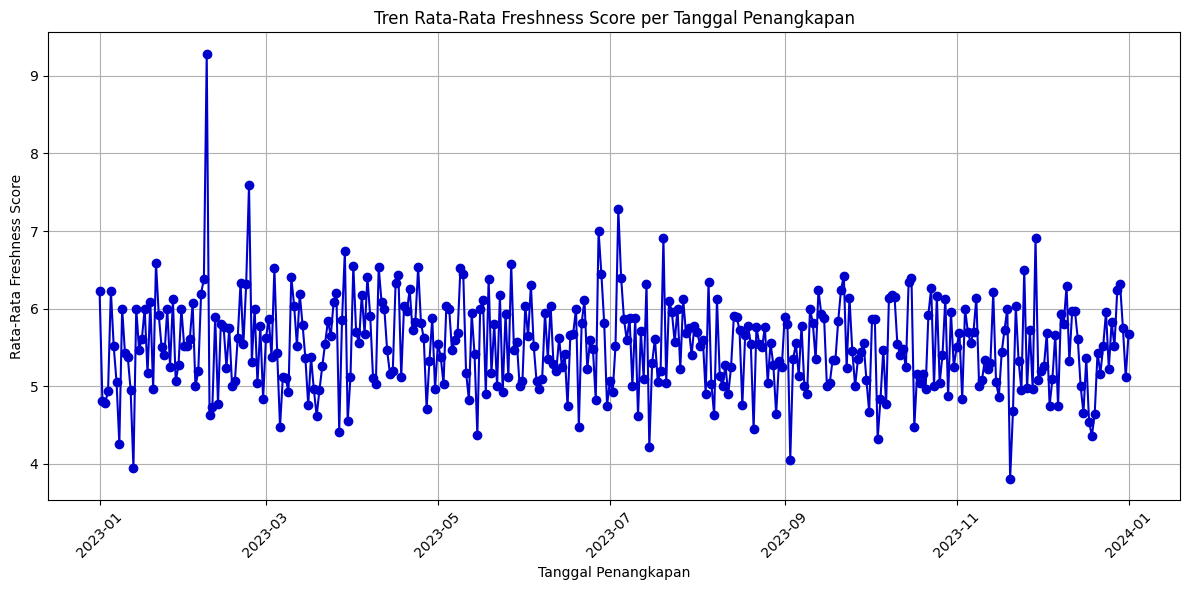

In [ ]:
# Pastikan catch_date dalam format datetime
df['catch_date'] = pd.to_datetime(df['catch_date'])

# Hitung rata-rata freshness_score per tanggal
freshness_score = df.groupby('catch_date')['freshness_score'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(freshness_score['catch_date'], freshness_score['freshness_score'],
         marker='o', linestyle='-', color='mediumblue')
plt.title('Tren Rata-Rata Freshness Score per Tanggal Penangkapan')
plt.xlabel('Tanggal Penangkapan')
plt.ylabel('Rata-Rata Freshness Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()